

```
# Isto está formatado como código
```

# DNC DATA EXPERT

# Dinâmica 01 - New York Flights

## CARREGAMENTO DAS BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## CARREGAMENTO DOS DADOS

In [ ]:
df = pd.read_csv('nyflights.csv')

In [ ]:
df.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [ ]:
df.shape

(336776, 20)

In [ ]:
# Remover a primeira coluna pois o Python já possui indexação
df = df.drop('Unnamed: 0', 1)

In [ ]:
df.isnull().sum() / df.shape[0]

year              0.000000
month             0.000000
day               0.000000
dep_time          0.024512
sched_dep_time    0.000000
dep_delay         0.024512
arr_time          0.025872
sched_arr_time    0.000000
arr_delay         0.028001
carrier           0.000000
flight            0.000000
tailnum           0.007459
origin            0.000000
dest              0.000000
air_time          0.028001
distance          0.000000
hour              0.000000
minute            0.000000
time_hour         0.000000
dtype: float64

## QUESTÕES A SEREM RESPONDIDAS

01 - Quais são as métricas de centralização, variabilidade e quantis dos vôos que atrasam mais que duas horas para decolar? Responda de modo numérico e gráfico.

02 - Quais destinos geraram vôos com o maior número de atrasos na partida? Responda de modo qantitativo e gráfico. (5 piores | Considerar 5 minutos um atraso aceitável)

03 - Para os 5 piores destinos com maior número de voôes atrasados na partida, calcule as estatísticas descritivas da velocidade média durante o vôo.

PLUS - Aumentar a velocidade média dos voôs pode ser uma solução para diminuir os atrasos? Responda graficamente.

## QUESTÃO 01

### Filtrar a tabela: atraso > 2hrs

In [ ]:
df_1 = df[df['dep_delay'] > 120] # variavel esta em minutos

### Estatísticas descritivas para os atrados

In [ ]:
df_1.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
218,2013,1,1,957.0,733,144.0,1056.0,853,123.0,UA,856,N534UA,EWR,BOS,37.0,200,7,33,2013-01-01 07:00:00
268,2013,1,1,1114.0,900,134.0,1447.0,1222,145.0,UA,1086,N76502,LGA,IAH,248.0,1416,9,0,2013-01-01 09:00:00
491,2013,1,1,1540.0,1338,122.0,2020.0,1825,115.0,B6,705,N570JB,JFK,SJU,193.0,1598,13,38,2013-01-01 13:00:00
649,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00


In [ ]:
dfT_1 = df_1[['dep_delay']].describe().T
dfT_1

,count,mean,std,min,25%,50%,75%,max
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0


Amplitude:

\begin{equation}
A = max - min
\end{equation}

In [ ]:
# Adicionar uma coluna para a amplitude
dfT_1['range'] = dfT_1['max'] - dfT_1['min']

dfT_1.head()

,count,mean,std,min,25%,50%,75%,max,range
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0,1180.0


Desvio padrão:
\begin{equation}
std = \sqrt{var} 
\end{equation}

Variancia:
\begin{equation}
var = \frac{\sum{x - \hat{x}}}{n - 1} 
\end{equation}

In [ ]:
# Adicionar uma coluna para variância
dfT_1['var'] = pow(dfT_1['std'], 2)

dfT_1.head()

,count,mean,std,min,25%,50%,75%,max,range,var
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0,1180.0,5564.687952


A média de atrasos para os vôos que atrasam mais que duas horas é de 187 minutos com desvio padrão de 75 minutos. A mediana é de 166 minutos. o maior atraso foi de 1301 minutos (21,86 horas... ouch!).

### Análise gráfica dos atrasos maiores que duas horas.

#### Histograma

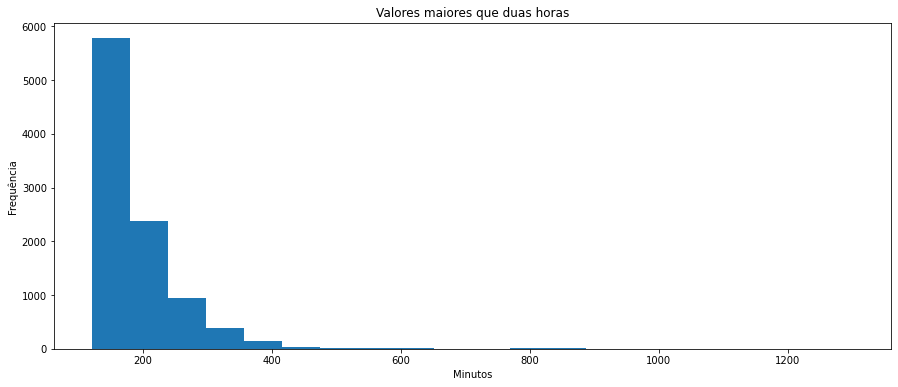

In [ ]:
# Cria a figura 'vazia'
fig = plt.figure(figsize=(15,6))

# Plota o histograma
plt.hist(df_1['dep_delay'], bins = 20)

# Adiciona título e subtítulo
plt.title('Valores maiores que duas horas')

# Adiciona título aos eixos 
plt.xlabel('Minutos')
plt.ylabel('Frequência')

plt.show()

#### Box Plot

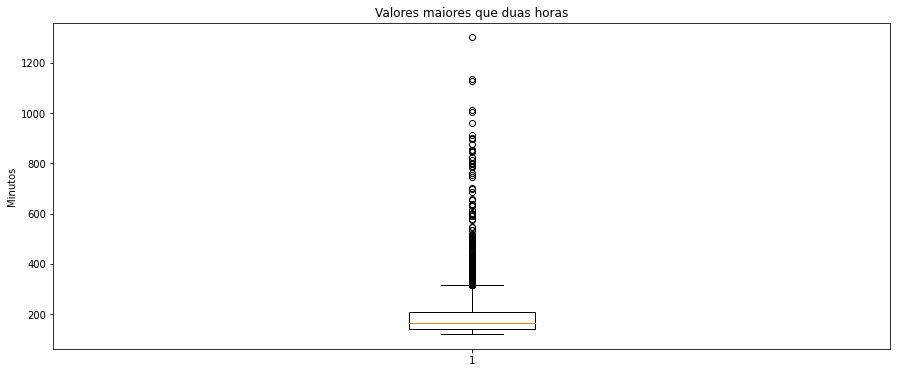

In [ ]:
fig = plt.figure(figsize=(15,6))

plt.boxplot(df_1['dep_delay'])

plt.title('Valores maiores que duas horas')
plt.ylabel('Minutos')
plt.show()

## QUESTÃO 02

### Filtrar tabela com vôos que atrasaram

In [ ]:
df_2 = df[df['dep_delay'] > 5]
df_2.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
25,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,2013-01-01 06:00:00
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00
31,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096,6,10,2013-01-01 06:00:00
41,2013,1,1,632.0,608,24.0,740.0,728,12.0,EV,4144,N13553,EWR,IAD,52.0,212,6,8,2013-01-01 06:00:00
47,2013,1,1,644.0,636,8.0,931.0,940,-9.0,UA,1701,N75435,EWR,FLL,151.0,1065,6,36,2013-01-01 06:00:00


In [ ]:
# Menor quantidade de atrasos
df_2['dest'].value_counts().tail()

MTJ    6
SBN    6
EYW    6
PSP    3
ANC    3
Name: dest, dtype: int64

In [ ]:
# Maior quantidade de atrasos
df_2['dest'].value_counts().head()

ORD    4975
ATL    4687
LAX    4442
MCO    4083
SFO    4078
Name: dest, dtype: int64

In [ ]:
df_2['dest'].value_counts().index

Index(['ORD', 'ATL', 'LAX', 'MCO', 'SFO', 'FLL', 'BOS', 'CLT', 'MIA', 'DEN',
       ...
       'MYR', 'CHO', 'JAC', 'BZN', 'HDN', 'MTJ', 'SBN', 'EYW', 'PSP', 'ANC'],
      dtype='object', length=103)

In [ ]:
df_2['dest'].nunique()

103

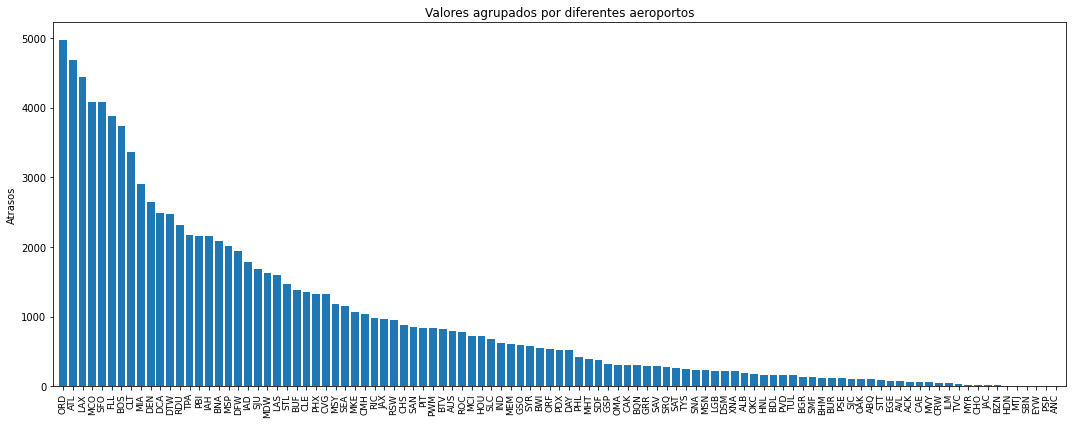

In [ ]:
fig = plt.figure(figsize=(15,6))

plt.bar(df_2['dest'].value_counts().index, df_2['dest'].value_counts().values)

plt.title('Valores agrupados por diferentes aeroportos')
plt.xticks(rotation=90, fontsize=9)
plt.xlim([-1,df_2['dest'].nunique()])

plt.ylabel('Atrasos')

plt.tight_layout()
plt.show()

## QUESTÃO 03

### Filtrar a tabela somente com os piores destinos

In [ ]:
list(df_2['dest'].value_counts().head().index)

['ORD', 'ATL', 'LAX', 'MCO', 'SFO']

In [ ]:
df_3 = df[(df['dest'] == 'ORD') | (df['dest'] == 'ATL') | (df['dest'] == 'LAX') | (df['dest'] == 'MCO') | (df['dest'] == 'SFO')]

In [ ]:
df_3.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00
12,2013,1,1,558.0,600,-2.0,924.0,917,7.0,UA,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01 06:00:00


### Calculara velocidade média de cada vôo

Velocidade:

\begin{equation}
V = \frac{distancia}{tempo}
\end{equation}

In [ ]:
df_3['avgVel'] = df_3['distance'] / df_3['air_time']

### Agrupar a tabela com os piores destinos

In [ ]:
df_3.groupby('dest')['avgVel'].describe().reset_index()

,dest,count,mean,std,min,25%,50%,75%,max
0,ATL,16837.0,6.753035,0.566571,4.238636,6.350000,6.781818,7.173077,11.723077
1,LAX,16026.0,7.546656,0.417471,5.625000,7.258065,7.527607,7.832278,9.000000
2,MCO,13967.0,7.039759,0.535162,4.418605,6.692857,7.097744,7.433071,8.822430
3,ORD,16566.0,6.352171,0.518625,3.631313,6.008197,6.373913,6.724771,8.264368
4,SFO,13173.0,7.475697,0.367288,5.277551,7.223464,7.473988,7.725904,8.694915


### Plotar box-plot para os quatro destinos.

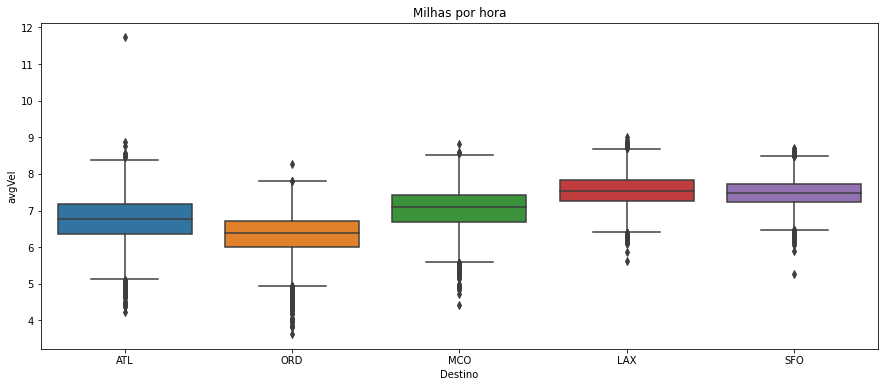

In [ ]:
fig = plt.figure(figsize=(15,6))

sns.boxplot(x = df_3['dest'], y = df_3['avgVel'])

plt.xlabel('Destino')

plt.title('Milhas por hora')

plt.show()

## Questão PLUS 

### Criar tabela com os 'melhores destinos'

In [ ]:
# Seleciona os melhores destinos
list(df_2['dest'].value_counts().tail().index)

['MTJ', 'SBN', 'EYW', 'PSP', 'ANC']

In [ ]:
df_4 = df[(df['dest'] == 'MTJ') |
          (df['dest'] == 'SBN') |
          (df['dest'] == 'EYW') |
          (df['dest'] == 'PSP') |
          (df['dest'] == 'ANC')]

In [ ]:
# Criar a coluna com a volocidade média
df_4['avgVel'] = df_4['distance'] / df_4['air_time']

In [ ]:
df_3['desType'] = 'worst'
df_4['desType'] = 'best'

### Empilhar planilha com destinos bons e ruins.

In [ ]:
df_5 = pd.concat([df_3, df_4], axis=0)

In [ ]:
df_5.reset_index(drop=True, inplace=True)

### Criar gráfico de box plot para explorar as diferenças

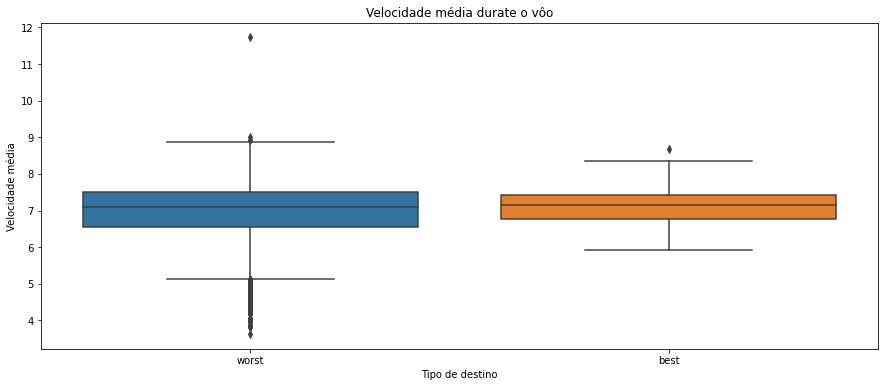

In [ ]:
fig = plt.figure(figsize=(15,6))

sns.boxplot(x = df_5['desType'], y = df_5['avgVel'])

plt.ylabel('Velocidade média')

plt.xlabel('Tipo de destino')

plt.title('Velocidade média durate o vôo')

plt.show()

As velocidades médias do voôs que mais atrasam e que menos atrasam tende a ser a mesma. Por isso aumentá-la não parece ser uma boa solução inicialmente.